In [1]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the random module.
import random
# Import the NumPy module.
import numpy as np
# Import timeit.
import timeit
import pandas as pd
import matplotlib.pyplot as plt
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [3]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
   
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
# Convert the array of dictionaries to a Pandas DataFrame.
#city_data_df = pd.DataFrame(city_data)
#city_data_df

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | abha
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | barreirinha
Processing Record 6 of Set 1 | catumbela
Processing Record 7 of Set 1 | itoman
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | save
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | balkhash
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | henties bay
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | sao miguel do araguaia
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | katsuura
Processing Record 21 of Set 1 | cayenne
Processing Record 22 of Set 1 | isangel
Processing Record 23 of Set 1 | yelizov

Processing Record 39 of Set 4 | severo-kurilsk
Processing Record 40 of Set 4 | hualmay
Processing Record 41 of Set 4 | milverton
Processing Record 42 of Set 4 | souillac
Processing Record 43 of Set 4 | saskylakh
Processing Record 44 of Set 4 | andrelandia
Processing Record 45 of Set 4 | airai
Processing Record 46 of Set 4 | angoche
Processing Record 47 of Set 4 | kushima
Processing Record 48 of Set 4 | toyooka
Processing Record 49 of Set 4 | zhongxing
Processing Record 50 of Set 4 | maneadero
Processing Record 1 of Set 5 | soyo
Processing Record 2 of Set 5 | sulangan
Processing Record 3 of Set 5 | innisfail
Processing Record 4 of Set 5 | upernavik
Processing Record 5 of Set 5 | rumphi
Processing Record 6 of Set 5 | west plains
Processing Record 7 of Set 5 | jishou
Processing Record 8 of Set 5 | polyarnyy
Processing Record 9 of Set 5 | puerto madero
Processing Record 10 of Set 5 | deer lake
Processing Record 11 of Set 5 | price
Processing Record 12 of Set 5 | inirida
Processing Record 1

Processing Record 27 of Set 8 | tura
Processing Record 28 of Set 8 | sitka
Processing Record 29 of Set 8 | evensk
Processing Record 30 of Set 8 | apollonia
Processing Record 31 of Set 8 | valparaiso
Processing Record 32 of Set 8 | kasama
Processing Record 33 of Set 8 | hambantota
Processing Record 34 of Set 8 | tanete
Processing Record 35 of Set 8 | rehoboth
Processing Record 36 of Set 8 | mason city
Processing Record 37 of Set 8 | minden
Processing Record 38 of Set 8 | necochea
Processing Record 39 of Set 8 | pendleton
Processing Record 40 of Set 8 | taoudenni
Processing Record 41 of Set 8 | karratha
Processing Record 42 of Set 8 | georgetown
Processing Record 43 of Set 8 | silver city
Processing Record 44 of Set 8 | sorong
Processing Record 45 of Set 8 | ixtapa
Processing Record 46 of Set 8 | padang
Processing Record 47 of Set 8 | ayr
Processing Record 48 of Set 8 | cidreira
Processing Record 49 of Set 8 | pangkalanbuun
Processing Record 50 of Set 8 | bacuit
City not found. Skipping.

Processing Record 16 of Set 12 | moron
Processing Record 17 of Set 12 | visby
Processing Record 18 of Set 12 | ituni
City not found. Skipping...
Processing Record 19 of Set 12 | husum
Processing Record 20 of Set 12 | saint-georges
Processing Record 21 of Set 12 | djougou
Processing Record 22 of Set 12 | pangai
Processing Record 23 of Set 12 | maloy
Processing Record 24 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 25 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 26 of Set 12 | peniche
Processing Record 27 of Set 12 | santa cruz de la palma
Processing Record 28 of Set 12 | nanao
Processing Record 29 of Set 12 | araouane
Processing Record 30 of Set 12 | karamay
City not found. Skipping...
Processing Record 31 of Set 12 | pitimbu
Processing Record 32 of Set 12 | miro khan
Processing Record 33 of Set 12 | nurlat
Processing Record 34 of Set 12 | dargaville
Processing Record 35 of Set 12 | ust-kulom
Processing Record 36 of Set 12 | aklavik
Pr

In [4]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Abha,18.22,42.51,68.00,59,97,5.73,SA,2020-08-18 00:00:22
1,Albany,42.60,-73.97,72.00,74,12,4.50,US,2020-08-17 23:59:21
2,Hilo,19.73,-155.09,84.20,62,75,11.41,US,2020-08-18 00:00:23
3,Rikitea,-23.12,-134.97,71.94,74,17,7.40,PF,2020-08-17 23:56:51
4,Barreirinha,-2.79,-57.07,84.97,39,43,2.33,BR,2020-08-18 00:00:24
...,...,...,...,...,...,...,...,...,...
581,Terrak,65.09,12.37,50.00,93,0,5.82,NO,2020-08-18 00:03:37
582,Haines Junction,60.75,-137.51,51.62,81,100,3.47,CA,2020-08-18 00:03:37
583,Tilichiki,60.47,166.10,57.34,43,7,14.90,RU,2020-08-18 00:03:37
584,Lisakovsk,52.54,62.49,52.95,78,83,12.77,KZ,2020-08-18 00:03:38


In [5]:
new_order=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']
city_data_df=city_data_df[new_order]
city_data_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Abha,97,SA,2020-08-18 00:00:22,59,18.22,42.51,68.00,5.73
1,Albany,12,US,2020-08-17 23:59:21,74,42.60,-73.97,72.00,4.50
2,Hilo,75,US,2020-08-18 00:00:23,62,19.73,-155.09,84.20,11.41
3,Rikitea,17,PF,2020-08-17 23:56:51,74,-23.12,-134.97,71.94,7.40
4,Barreirinha,43,BR,2020-08-18 00:00:24,39,-2.79,-57.07,84.97,2.33
...,...,...,...,...,...,...,...,...,...
581,Terrak,0,NO,2020-08-18 00:03:37,93,65.09,12.37,50.00,5.82
582,Haines Junction,100,CA,2020-08-18 00:03:37,81,60.75,-137.51,51.62,3.47
583,Tilichiki,7,RU,2020-08-18 00:03:37,43,60.47,166.10,57.34,14.90
584,Lisakovsk,83,KZ,2020-08-18 00:03:38,78,52.54,62.49,52.95,12.77


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [9]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1597709079.7630968

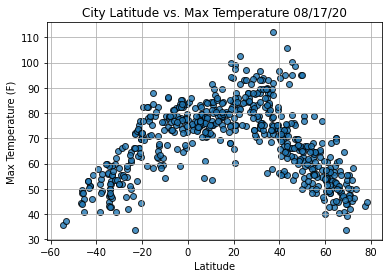

In [10]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

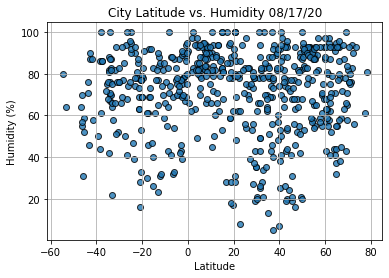

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

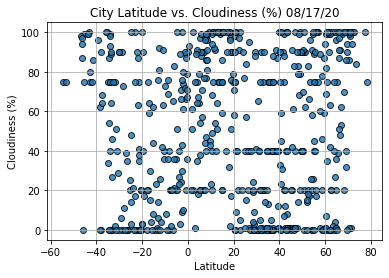

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

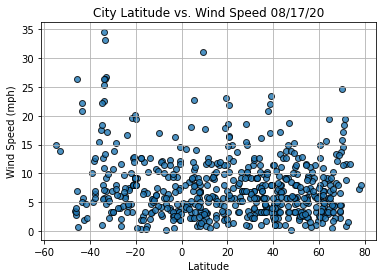

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()